In [3]:
# Load images
import os, shutil

original_dataset_dir = '/Users/daniel/Downloads/kaggle-dogs-and-cats'

base_dir = '/Users/daniel/Documents/IC/chollet-experiments/chapter-5/data-cats-n-dogs'

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')

# os.mkdir(base_dir)
# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [4]:
# Create neural network
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

In [5]:
# Compile 
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [6]:
# Use generators for data flow
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64, 64),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# Train model
# history = model.fit_generator(train_generator,
#       steps_per_epoch=100,
#       epochs=30,
#       validation_data=validation_generator,
#       validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 187s 2s/step - loss: 0.6958 - acc: 0.5405 - val_loss: 0.6779 - val_acc: 0.5600
Epoch 2/30
100/100 [==============================] - 190s 2s/step - loss: 0.6627 - acc: 0.6100 - val_loss: 0.6398 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 176s 2s/step - loss: 0.6125 - acc: 0.6745 - val_loss: 0.6232 - val_acc: 0.6430
Epoch 4/30
100/100 [==============================] - 150s 2s/step - loss: 0.5733 - acc: 0.6975 - val_loss: 0.6116 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 121s 1s/step - loss: 0.5394 - acc: 0.7315 - val_loss: 0.6021 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 129s 1s/step - loss: 0.5243 - acc: 0.7395 - val_loss: 0.6091 - val_acc: 0.6610
Epoch 7/30
100/100 [==============================] - 128s 1s/step - loss: 0.4937 - acc: 0.7575 - val_loss: 0.5726 - val_acc: 

In [9]:
# Save model
# model.save('cats_and_dogs_small_1.h5')

In [8]:
# Plot loss and acc
import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [9]:
# Setting up data augmentation
datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
    fill_mode='nearest')

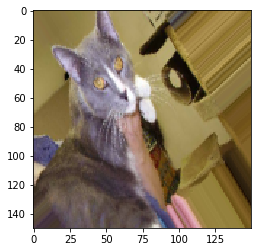

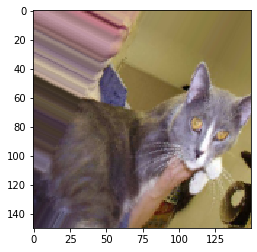

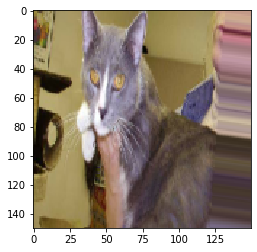

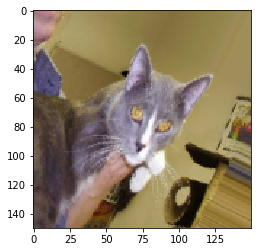

In [10]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[6]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [11]:
# Creating model with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Train the model with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255) # Test data does not augment

train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

history = model.fit(train_generator,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 41s 650ms/step - loss: 0.6889 - acc: 0.5405 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 31s 484ms/step - loss: 0.6843 - acc: 0.5625
Epoch 3/100
63/63 [==============================] - 27s 428ms/step - loss: 0.6777 - acc: 0.5690
Epoch 4/100
63/63 [==============================] - 27s 434ms/step - loss: 0.6758 - acc: 0.5845
Epoch 5/100
37/63 [================>.............] - ETA: 12s - loss: 0.6723 - acc: 0.5839

KeyboardInterrupt: 

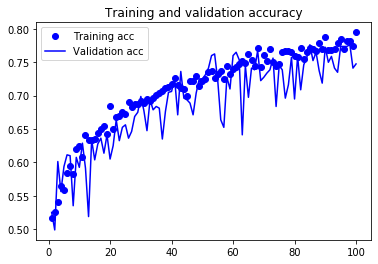

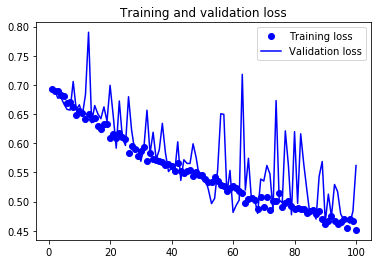

In [92]:
# Plot loss and acc
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') plt.legend()
plt.show()

In [24]:
train_generator.next()[0].shapea

(32, 150, 150, 3)

In [42]:
train_img_random = validation_generator.next()

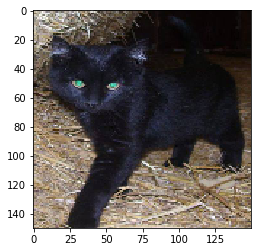

In [45]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

imgplot = plt.imshow(image.array_to_img(train_img_random[0][0]))
plt.show()